In [1]:
#problem statement
#we are given dataset of list of salaries of employees at LMN Co. lTD.
#The HR here has got a candidate with 7 years of experience 
#we need to predict the best salary that should be offered to him?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv("D:/datasets/data preprocessing/Employee_Salary_Data.csv")
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#sperating independent and dependent cariable 
#encoding is not required
X=dataset.iloc[:,:-1].values #independent variable
Y=dataset.iloc[:,-1].values #dependent variable

In [5]:
#splitting dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size =1/3, random_state =0)

In [6]:
print(X_train, Y_train)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] [ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


In [7]:
print(X_test, Y_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]] [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


In [8]:
#main regression code

from sklearn.linear_model import LinearRegression 

#naming the object as'regressor' and simply calling the class constructor linearregression()
#no parameters required

regressor=LinearRegression()
regressor.fit(X_train, Y_train) #fit() links object regressor to training set

LinearRegression()

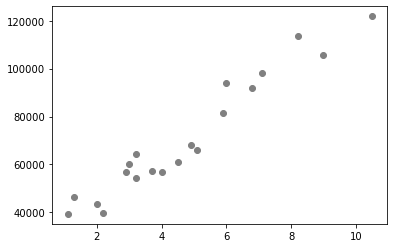

In [9]:
#visualizing the training set
#scatter plot is made for regression
plt.scatter(X_train,Y_train, color='gray')

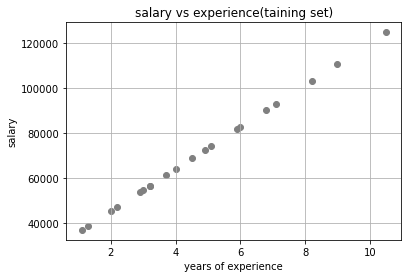

In [10]:
plt.scatter(X_train, regressor.predict(X_train), color="gray")
plt.title('salary vs experience(taining set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.grid()
plt.show()


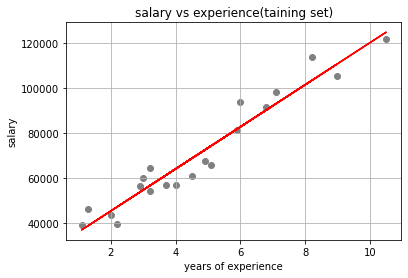

In [11]:
#plotting actual and predicted values together
plt.scatter(X_train,Y_train, color="gray")
plt.plot(X_train, regressor.predict(X_train),color="red")
plt.title('salary vs experience(taining set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.grid()
plt.show()

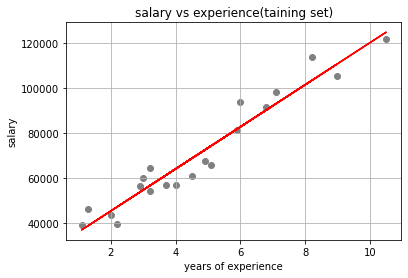

In [12]:
#visualizing the test set result


plt.scatter(X_train,Y_train, color='gray')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('salary vs experience(taining set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.grid()
plt.show()


In [13]:
#predicting the test set results for single vector

Y_pred1=regressor.predict([[int(input("Enter Years of Experience "))]]) #independent feature is in 2d matrix dependent is in series as its usually 1 
print("Predicted salary", Y_pred1)


#Y_pred2=regressor.predict([[7]])
#print(Y_pred2)



Enter Years of Experience 40
Predicted salary [400653.88996893]


In [14]:
#predicting the test set results for array x_test
#obs of test set are 6 in numbers 
Y_pred3=regressor.predict(X_test)
print(Y_pred3)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [15]:
#getting the final linear regression equation witht he values of coeffiencients 
#y=mx+c or y=b0+b1.x

print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031176


In [16]:
#forming equation of linear regression 
#model evaluation
#y=mx+c
#y=salary, m= regressor.coef_, x = years of experience , c= regressor.intercept_
#salary=9345.94xyears of experience+26816.19
print('R squared: {:.2f}'.format(regressor.score(X,Y)*100)) #score takes the whole column x and y

R squared: 95.65


In [17]:
#interpretting accuracy 
#r squared is the coefficient of determination aaas paas kai points of trend lines 
#it tells us how many points fall on the regression line 
#the value of r square is 95.65 which indicates that 95.65% of the datafit the regression model 

#the difference between regression and classification is that 
#regression is used when we need to predict a contionous real value like a salary or grades
#colassification is used when we need to predict a category or a class.
regressor.score(X_test,Y_test)

0.9749154407708353